# Customer Churn Prediction

## Exploratory Data Analysis (EDA)

#### Import library yang akan digunakan

In [2]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
#Standard libraries for data visualization:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

#### Import Dataset

In [3]:
dataset = pd.read_csv('train.csv')

#### Evaluasi Struktur Data

In [4]:
dataset.head()

state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no  
4                              3    no

In [5]:
dataset.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

#### Cek Null dan NaN

NaN berarti 0/0 Singkatan dari Not a Number NA : secara umum diartikan sebagai nilai yang hilang, tidak ada.
Sedangkan NULL adalah objek kosong.

In [7]:
dataset.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [8]:
dataset.isna().any()

state                            False
account_length                   False
area_code                        False
international_plan               False
voice_mail_plan                  False
number_vmail_messages            False
total_day_minutes                False
total_day_calls                  False
total_day_charge                 False
total_eve_minutes                False
total_eve_calls                  False
total_eve_charge                 False
total_night_minutes              False
total_night_calls                False
total_night_charge               False
total_intl_minutes               False
total_intl_calls                 False
total_intl_charge                False
number_customer_service_calls    False
churn                            False
dtype: bool

Dari data yang dimiliki, semua kolom tidak memiliki data null atau NaN

#### Cek Distribusi Variabel Target

no     3652
yes     598
Name: churn, dtype: int64


<AxesSubplot:title={'center':'Churn Counts'}>

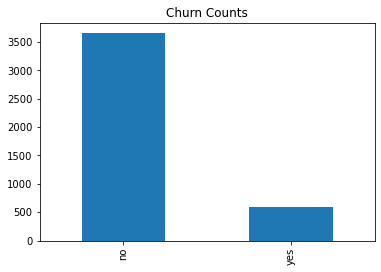

In [9]:
print(dataset['churn'].value_counts())
dataset['churn'].value_counts().plot(kind='bar', title = 'Churn Counts')

Dapat dilihat pada grafik diatas, data churn yang akan menjadi label dalam melakukan klasifikasi memiliki data yang tidak seimbang (imbalanced data)

#### Plot Distribusi Data dan Outliers Pada Data Numerik

In [10]:
df_numeric = dataset.drop(['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn'], axis=1)
#Histogram:
numeric_column_names = list(df_numeric.columns)

C:\Users\laode\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\laode\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\laode\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

C:\Users\laode\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\laode\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool
  sketch_params: (scale: float, length: float, randomness: float)
 

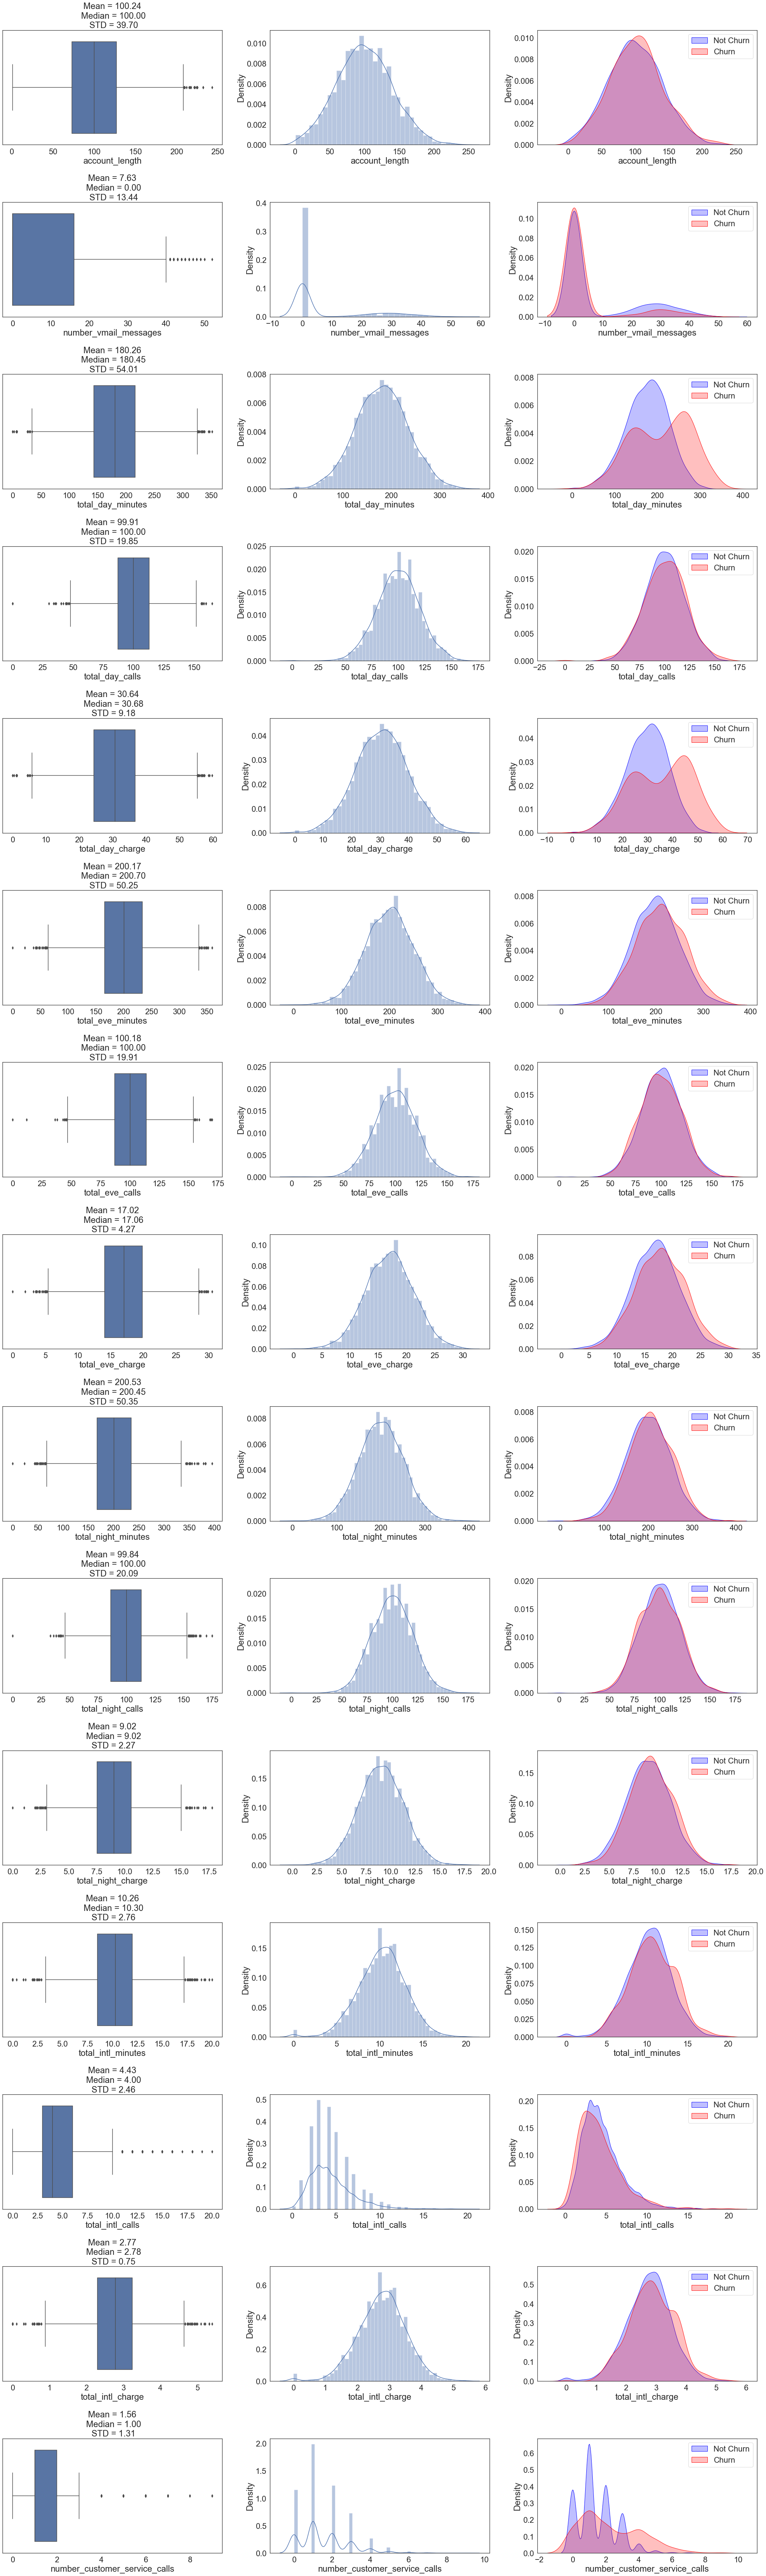

In [11]:
sns.set(style='white', font_scale = 2)
  
def observasi_num(df, features):  
    fig, axs = plt.subplots(len(df_numeric.columns), 3, figsize=(30, 100))
    for i, col in enumerate(features):
        sns.boxplot(df[col], ax = axs[i][0])
        sns.distplot(df[col], ax = axs[i][1])  
        x = sns.kdeplot(df[col][(dataset['churn'] == 'no')], ax = axs[i][2], color = 'Blue', shade=True) 
        x = sns.kdeplot(df[col][(dataset['churn'] == 'yes')], ax = axs[i][2], color = 'Red', shade=True) 
        x.legend(['Not Churn', 'Churn'], loc = 'upper right')
        axs[i][0].set_title('Mean = %.2f\n Median = %.2f\n STD = %.2f'%(df[col].mean(), df[col].median(), df[col].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()  
   
observasi_num(dataset, list(df_numeric.columns))

Dapat dilihat pada visualisasi diatas bahwa terdapat outliers pada setiap kolom data numerik. Jadi outlier tersebut akan coba dihapus karena dapat menyebabkan varians data menjadi lebih besar, interval data dan range menjadi lebar, mean tidak dapat menunjukkan nilai yang sebenarnya (bias), dan pada beberapa analisa data, outlier dapat menyebabkan kesalahan dalam pengambilan keputusan dan kesimpulan.

#### Distribusi Data Kategorikal

In [10]:
df_categorical = dataset[['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']]
df_categorical

state      area_code international_plan voice_mail_plan churn
0       OH  area_code_415                 no             yes    no
1       NJ  area_code_415                 no              no    no
2       OH  area_code_408                yes              no    no
3       OK  area_code_415                yes              no    no
4       MA  area_code_510                 no             yes    no
...    ...            ...                ...             ...   ...
4245    MT  area_code_415                 no              no    no
4246    WV  area_code_408                 no              no    no
4247    NC  area_code_408                 no              no    no
4248    HI  area_code_408                 no             yes    no
4249    VT  area_code_415                 no             yes    no

[4250 rows x 5 columns]

In [11]:
df_categorical.isnull().sum()

state                 0
area_code             0
international_plan    0
voice_mail_plan       0
churn                 0
dtype: int64

In [12]:
binary_churn = {'no': 0, 'yes' : 1}
df_categorical['churn'] = df_categorical['churn'].map(binary_churn)

C:\Users\laode\AppData\Local\Temp\ipykernel_37876\3745283248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['churn'] = df_categorical['churn'].map(binary_churn)


In [13]:
df_categorical.head()

state      area_code international_plan voice_mail_plan  churn
0    OH  area_code_415                 no             yes      0
1    NJ  area_code_415                 no              no      0
2    OH  area_code_408                yes              no      0
3    OK  area_code_415                yes              no      0
4    MA  area_code_510                 no             yes      0

##### 1. Distribusi data Churn Pada Tiap State

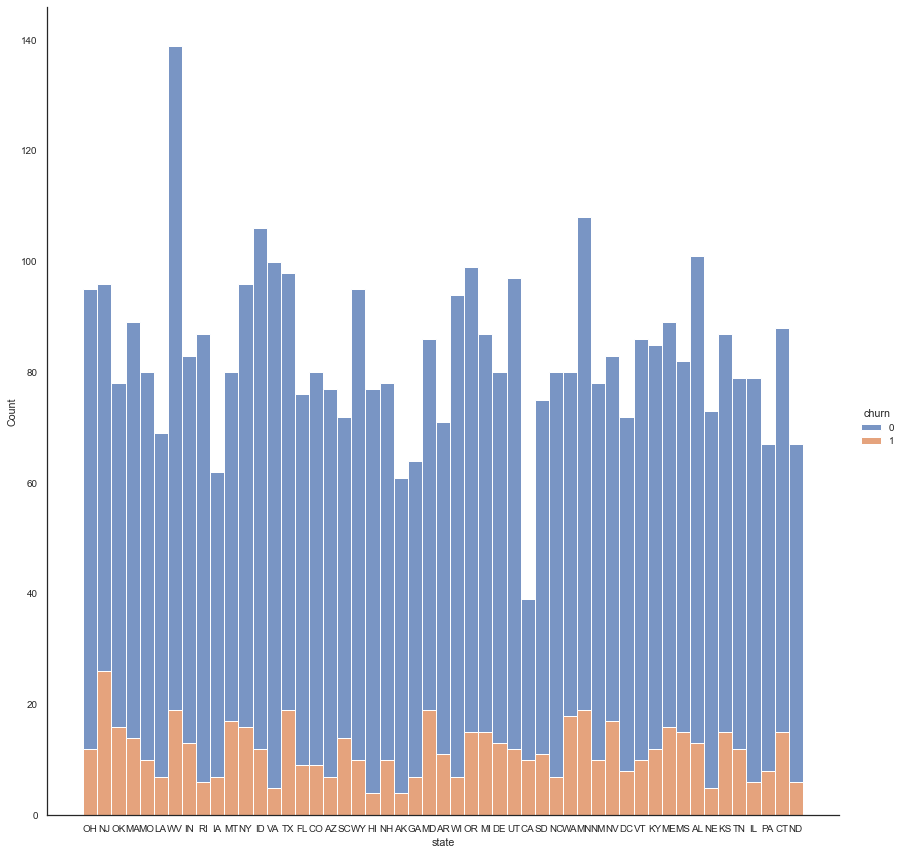

In [14]:
sns.set(style='white', font_scale = 0.9)
sns.displot(x='state', hue='churn', data=df_categorical, multiple = 'stack', height=12)

##### 2. Distribusi data Churn Pada Kode Area

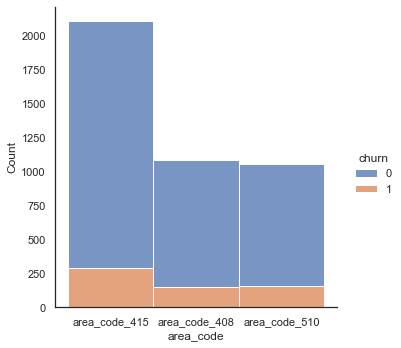

In [15]:
sns.set(style='white', font_scale = 1)
sns.displot(x='area_code', hue='churn', data=df_categorical, multiple = 'stack', height=5)

##### 3. Distribusi data Churn Pada Data International Plan

In [16]:
df_categorical.groupby('churn')['international_plan'].count()

churn
0    3652
1     598
Name: international_plan, dtype: int64

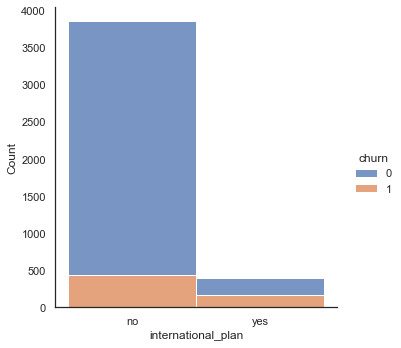

In [17]:
graph = sns.displot(x='international_plan', hue='churn', data=df_categorical, multiple = 'stack')


In [18]:
df_categorical.groupby('area_code')['churn'].count()

area_code
area_code_408    1086
area_code_415    2108
area_code_510    1056
Name: churn, dtype: int64

##### 4. Distribusi data Churn Pada Data Voice Mail Plan

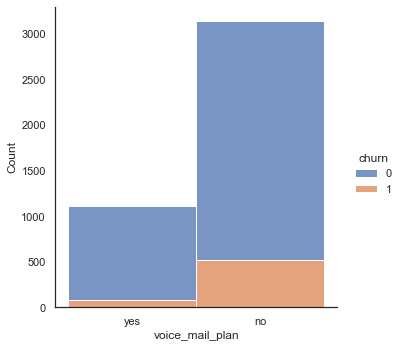

In [19]:
sns.displot(x='voice_mail_plan', hue='churn', data=df_categorical, multiple = 'stack')

### Data Preprocessing

#### Delete Outliers

In [20]:
def outliers(df, columns_name):
  Q1 = df[columns_name].quantile(0.25)
  Q3 = df[columns_name].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR

  ls = df.index[(df[columns_name]<lower_bound) | (df[columns_name]>upper_bound)]
  return ls

In [21]:
index_list = []
for feature in df_numeric:
  index_list.extend(outliers(df_numeric, feature))

In [22]:
def remove(df, ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df

In [23]:
df_num_cleaned = remove(df_numeric, index_list)

In [29]:
min_threshold, max_threshold = df_numeric['total_intl_calls'].quantile([0.25, 0.75])

df_numeric = df_numeric[(df_numeric['total_intl_calls'] < max_threshold) & (df_numeric['total_intl_calls'] > min_threshold)]

In [25]:
def remove_outlier(df, col):
    min_threshold, max_threshold = df[col].quantile([0.25, 0.75])
    
    df = df[(df[col] < max_threshold) & (df[col] > min_threshold)]
    return df

for i in df_numeric.columns:
    df_numeric_cleaned = remove_outlier(df_numeric, i)

In [30]:
df_numeric

account_length  number_vmail_messages  total_day_minutes  \
1                137                      0              243.4   
6                117                      0              184.5   
7                141                     37              258.6   
9                 74                      0              187.7   
11                95                      0              156.6   
...              ...                    ...                ...   
4236             137                      0              151.8   
4238             118                     31              226.6   
4240             127                     27              157.6   
4244              97                      0              252.6   
4248              50                     40              235.7   

      total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
1                 114             41.38              121.2              110   
6                  97             31.37              351.6               80   
7                  84             43.96              222.0              111   
9                 127             31.91              163.4              148   
11                 88             26.62              247.6               75   
...               ...               ...                ...              ...   
4236               90             25.81              229.6               68   
4238               99             38.52              164.9              136   
4240              107             26.79              280.6               49   
4244               89             42.94              340.3               91   
4248              127             40.07              223.0              126   

      total_eve_charge  total_night_minutes  total_night_calls  \
1                10.30                162.6                104   
6                29.89                215.8                 90   
7                18.87                326.4                 97   
9                13.89                196.0                 94   
11               21.05                192.3                115   
...                ...                  ...                ...   
4236             19.52                171.8                122   
4238             14.02                189.3                120   
4240             23.85                 75.1                 77   
4244             28.93                256.5                 67   
4248             18.96                297.5                116   

      total_night_charge  total_intl_minutes  total_intl_calls  \
1                   7.32                12.2                 5   
6                   9.71                 8.7                 4   
7                  14.69                11.2                 5   
9                   8.82                 9.1                 5   
11                  8.65                12.3                 5   
...                  ...                 ...               ...   
4236                7.73                10.8                 5   
4238                8.52                10.2                 5   
4240                3.38                 8.0                 4   
4244               11.54                 8.8                 5   
4248               13.39                 9.9                 5   

      total_intl_charge  number_customer_service_calls  
1                  3.29                              0  
6                  2.35                              1  
7                  3.02                              0  
9                  2.46                              0  
11                 3.32                              3  
...                 ...                            ...  
4236               2.92                              2  
4238               2.75                              3  
4240               2.16                              1  
4244               2.38                              1  
4248               2.67                            

c:\Users\laode\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\laode\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\laode\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
c:\Users\laode\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_metho

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool
  sketch_params: (scale: float, length: float, randomness: float)
 

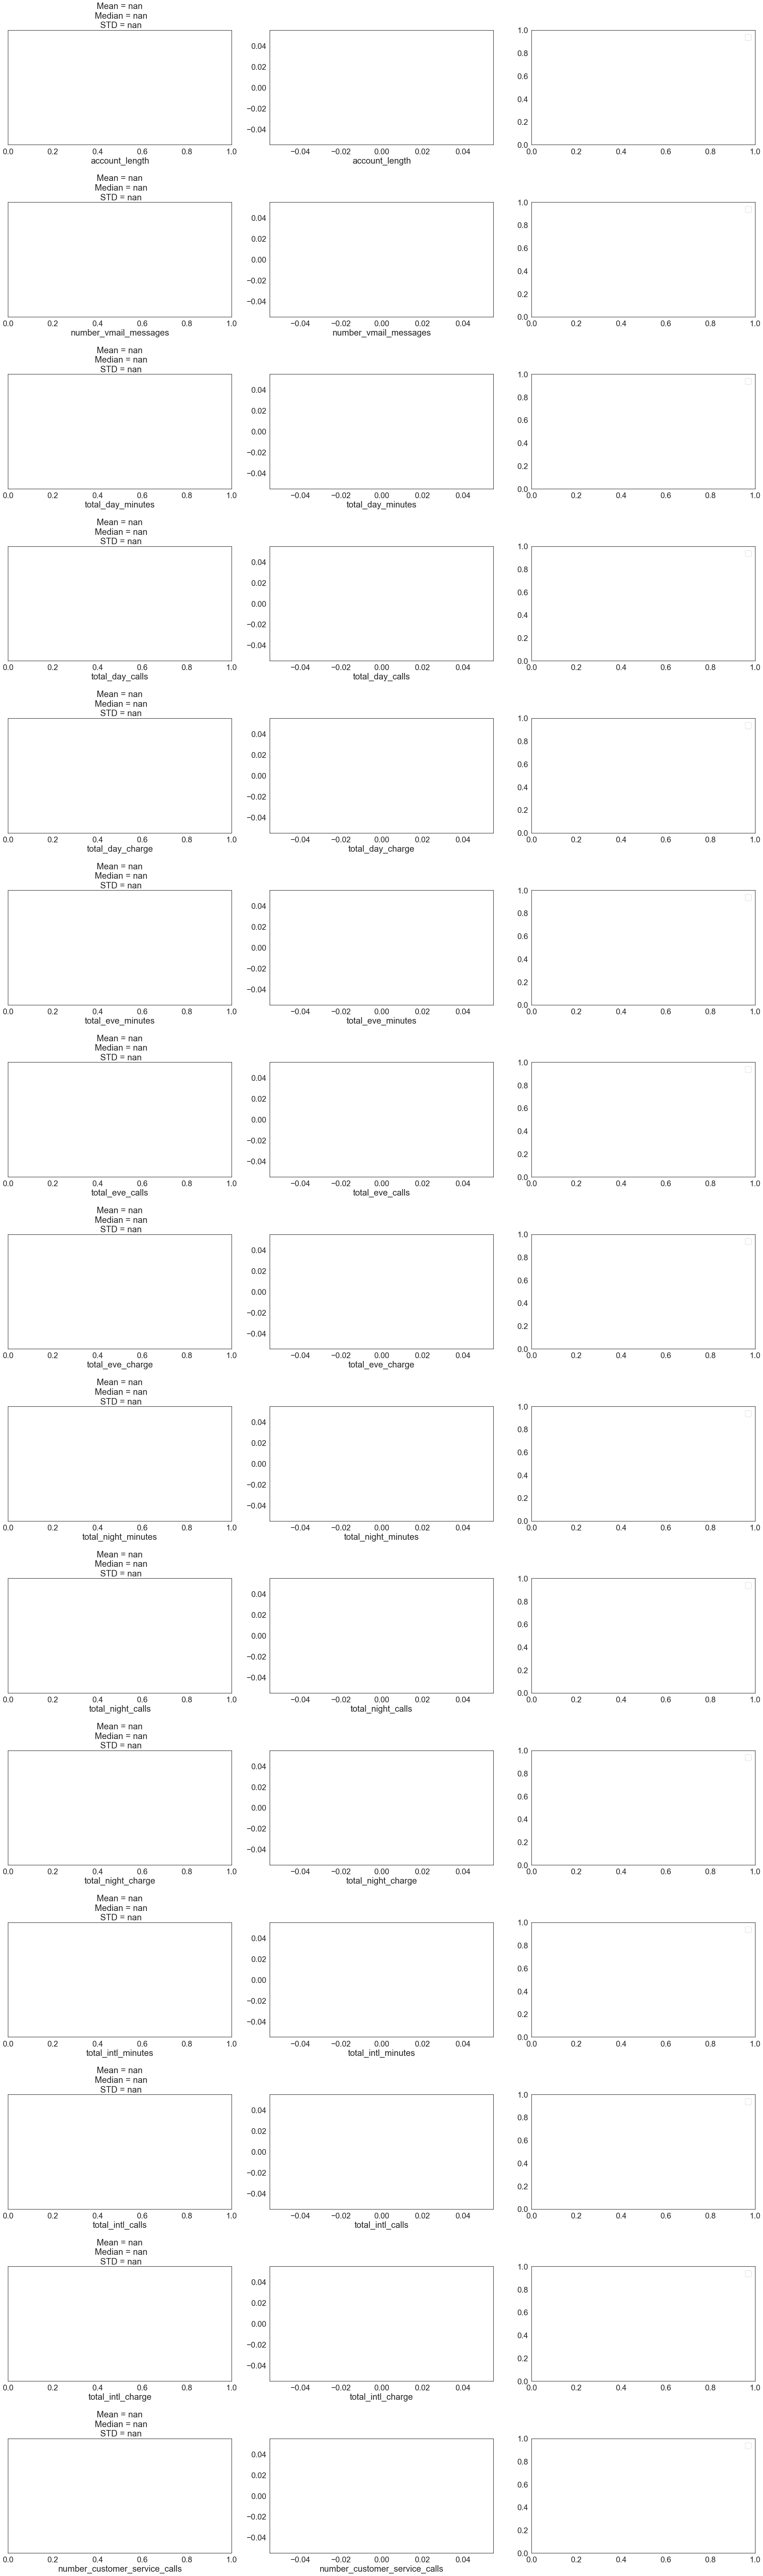

In [26]:
sns.set(style='white', font_scale = 2)

def observasi_num(df, features):  
    fig, axs = plt.subplots(len(df_numeric.columns), 3, figsize=(30, 100))
    for i, col in enumerate(features):
        sns.boxplot(df[col], ax = axs[i][0])
        sns.distplot(df[col], ax = axs[i][1])  
        x = sns.kdeplot(df[col][(dataset['churn'] == 'no')], ax = axs[i][2], color = 'Blue', shade=True) 
        x = sns.kdeplot(df[col][(dataset['churn'] == 'yes')], ax = axs[i][2], color = 'Red', shade=True) 
        x.legend(['Not Churn', 'Churn'], loc = 'upper right')
        axs[i][0].set_title('Mean = %.2f\n Median = %.2f\n STD = %.2f'%(df[col].mean(), df[col].median(), df[col].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()  
   
observasi_num(df_numeric_cleaned, list(df_numeric.columns))

Terapkan penghapusan outlier pada dataframe utama

In [43]:
Q1 = df_numeric_cleaned['total_day_minutes'].quantile(0.25)
Q3 = df_numeric_cleaned['total_day_minutes'].quantile(0.75)
IQR = Q3 - Q1

df_numeric_cleaned = df_numeric_cleaned[~((df_numeric_cleaned['total_day_minutes'] < (Q1 - 1.5 *IQR)) | (df_numeric_cleaned['total_day_minutes'] > (Q3 + 1.5 *IQR)))]

In [46]:
df_numeric_cleaned.shape

(2628, 15)

In [28]:
df_num_cleaned = df_num_cleaned[~((df_num_cleaned['total_intl_calls'] < (Q1 - 1.5 *IQR)) | (df_num_cleaned['total_intl_calls'] > (Q3 + 1.5 *IQR)))]
df_num_cleaned.shape

(3351, 15)

In [20]:
def remove_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    df = df[~((df[col] < (Q1 - 1.5 *IQR)) | (df[col] > (Q3 + 1.5 *IQR)))]
    return df

for i in df_numeric.columns:
    df_numeric = remove_outlier(df_numeric, i)

In [30]:
for i in df_numeric.columns:
    df_numeric = remove_outlier(df_numeric, i)

In [31]:
df_numeric.shape

(3501, 15)

In [29]:
test.shape

(4150, 15)